# Sentiment Analysis

In [2]:
import warnings
warnings.filterwarnings('ignore')
%pip install --upgrade protobuf==3.20.* transformers

Note: you may need to restart the kernel to use updated packages.


In [4]:
from transformers import pipeline
model = pipeline("sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")

In [5]:
# Make a sentiment prediction
text1 = "This workshop is useful."

model(text1)

[{'label': 'POSITIVE', 'score': 0.9983958601951599}]

In [6]:
text2 = "This workshop offers no added value."

model(text2)

[{'label': 'NEGATIVE', 'score': 0.9997496008872986}]

In [40]:
import pandas as pd
df = pd.DataFrame({
    "id":[1,2,3,4,5,6,7,8],
    "feedback":["Amazing!", "I really liked the topic!", "Boring!", "They don't know what they are talking about",
               "Really interesting!", "I learned a lot!", "I knew most of the stuff already!", "Nice presentation"]}) 

In [41]:
df

,id,feedback
0,1,Amazing!
1,2,I really liked the topic!
2,3,Boring!
3,4,They don't know what they are talking about
4,5,Really interesting!
5,6,I learned a lot!
6,7,I knew most of the stuff already!
7,8,Nice presentation


In [42]:
def get_feedback(text, model=model):
    return model(text)[0]["label"]

In [43]:
get_feedback("Hallo")

'POSITIVE'

In [44]:
df["sentiment"] = df.apply(lambda row: get_feedback(row["feedback"]), axis=1)

In [45]:
df

,id,feedback,sentiment
0,1,Amazing!,POSITIVE
1,2,I really liked the topic!,POSITIVE
2,3,Boring!,NEGATIVE
3,4,They don't know what they are talking about,NEGATIVE
4,5,Really interesting!,POSITIVE
5,6,I learned a lot!,POSITIVE
6,7,I knew most of the stuff already!,NEGATIVE
7,8,Nice presentation,POSITIVE


<Axes: >

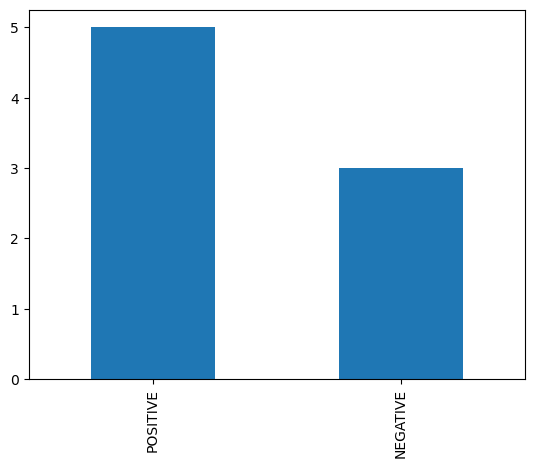

In [48]:
df.sentiment.value_counts().plot(kind="bar")